### Критерии Стьюдента

In [43]:
import numpy as np
import pandas as pd
import scipy
from statsmodels.stats.weightstats import *
import statsmodels.stats.weightstats as sw

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
data = pd.read_csv("data/ADHD.txt", sep=" ", header=0, names=["Placebo", "Methylphenidate"])

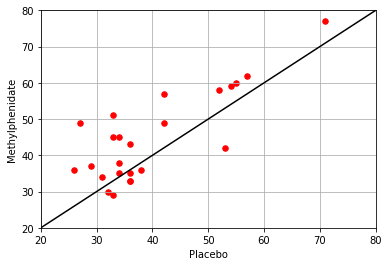

In [30]:
data.plot(kind="scatter", x="Placebo", y="Methylphenidate", s=30, c='r');
pylab.grid()
pylab.plot(range(100), c="black")
pylab.xlim((20, 80))
pylab.ylim((20, 80));

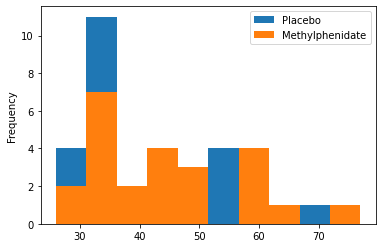

In [33]:
data.plot(kind="hist");

### Одновыборочный критрий Стьюдента

In [34]:
scipy.stats.ttest_1samp(data.Placebo, 50)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [66]:
print("Conf interval:{}, {}".format(*zconfint(data.Placebo, ddof=1))) 

Conf interval:35.223272709859756, 44.276727290140244


In [60]:
sw._tconfint_generic(data.Placebo.mean(), data.Placebo.std(ddof=1) / np.sqrt(len(data.Placebo)), len(data.Placebo) - 1, alpha=.05, alternative="two-sided")

(34.97223421812636, 44.52776578187364)

In [64]:
sw._zconfint_generic(data.Placebo.mean(), data.Placebo.std(ddof=1) / np.sqrt(len(data.Placebo)), alpha=.05, alternative="two-sided")

(35.223272709859756, 44.276727290140244)

### Двухвыборочный критерий Стьюдента (независимые выборки)

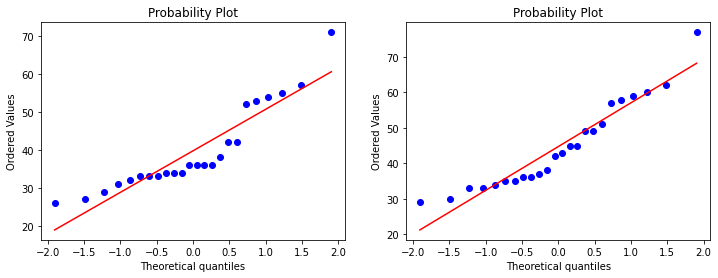

In [68]:
pylab.figure(figsize=(12, 4))
pylab.subplot(1, 2, 1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(1, 2, 2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab);

### Критерий Шапиро-Уилка

In [73]:
stats.shapiro(data.Placebo)

ShapiroResult(statistic=0.8574873208999634, pvalue=0.00302018690854311)

In [74]:
stats.shapiro(data.Methylphenidate)

ShapiroResult(statistic=0.9164453148841858, pvalue=0.04876822605729103)

In [82]:
stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var=False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [85]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
cm.tconfint_diff(alpha=.05)

(-1.914589250238282, 11.831255916904954)

### Двухвыборочный критерий Стьюдента (связанные выборки)

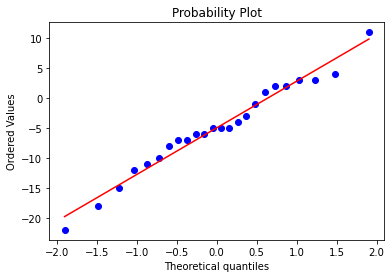

In [87]:
stats.probplot(data.Placebo - data.Methylphenidate, dist="norm", plot=pylab);

In [88]:
stats.shapiro(data.Placebo - data.Methylphenidate)

ShapiroResult(statistic=0.9798052906990051, pvalue=0.8922504186630249)

In [96]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [95]:
stats.ttest_1samp(data.Methylphenidate - data.Placebo, 0)

Ttest_1sampResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [94]:
DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean()

(1.7752357893192365, 8.14143087734743)